In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Simulated dataset
np.random.seed(0)
num_samples = 1000

square_footage = np.random.normal(2000, 500, num_samples)
num_bedrooms = np.random.randint(1, 6, num_samples)
location = np.random.choice(['City', 'Suburb', 'Rural'], num_samples)
prices = 30000 + (square_footage * 100) + (num_bedrooms * 5000) + np.random.normal(0, 10000, num_samples)

data = pd.DataFrame({
    'Square Footage': square_footage,
    'Bedrooms': num_bedrooms,
    'Location': location,
    'Price': prices
})

# Handling categorical variables
data = pd.get_dummies(data, columns=['Location'], drop_first=True)

# Splitting data into features and target
X = data.drop('Price', axis=1)
y = data['Price']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer, no activation for regression

model.compile(optimizer='adam', loss='mean_squared_error')


In [3]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 61687713792.0000
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 61686865920.0000
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 61685100544.0000
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 61681541120.0000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 61675286528.0000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 61665292288.0000
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 61650292736.0000
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 61629169664.0000
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 61600747520.0000
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 61563912192.0000
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 61517553664.0000
Epoch 12

25/25 [==============================] - 0s 2ms/step - loss: 10566513664.0000
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 10005019648.0000
Epoch 93/100
25/25 [==============================] - 0s 2ms/step - loss: 9460695040.0000
Epoch 94/100
25/25 [==============================] - 0s 2ms/step - loss: 8941934592.0000
Epoch 95/100
25/25 [==============================] - 0s 2ms/step - loss: 8445337088.0000
Epoch 96/100
25/25 [==============================] - 0s 2ms/step - loss: 7969126912.0000
Epoch 97/100
25/25 [==============================] - 0s 2ms/step - loss: 7515699712.0000
Epoch 98/100
25/25 [==============================] - 0s 2ms/step - loss: 7083909632.0000
Epoch 99/100
25/25 [==============================] - 0s 2ms/step - loss: 6672723968.0000
Epoch 100/100
25/25 [==============================] - 0s 2ms/step - loss: 6283097088.0000


In [4]:
data.head()

,Square Footage,Bedrooms,Price,Location_Rural,Location_Suburb
0,2882.026173,1,334101.404306,True,False
1,2200.078604,4,255644.350840,False,False
2,2489.368992,4,301708.470360,False,True
3,3120.446600,2,344426.579954,True,False
4,2933.778995,2,332461.399601,False,False


7/7 [==============================] - 0s 2ms/step
Mean Squared Error: 5988655196.99956


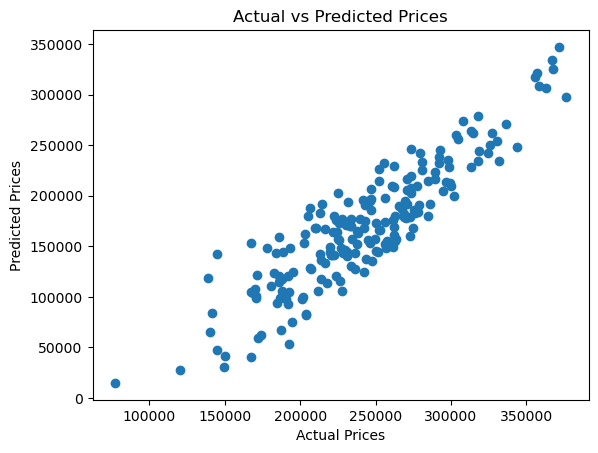

In [5]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize predicted vs actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
